# Geometric Transform, Skewed Text

**Geometric transformations**

To transform any 2D image, you can create a mathematical mapping that rotates, shifts, and stretches points into a desired shape. This mapping is calculated by OpenCV and applied using an 3x3 `perspective transformation matrix`, which you can learn more about, [here](https://en.wikipedia.org/wiki/Transformation_matrix). This matrix transforms the appearance of points but preserves straight lines that define an image plane.

**Applying the transform**

To create and apply this transformation, we used OpenCV's `getPerspectiveTransform` and `warpPerspective` functions, which are documented, [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html).

## Transform a license plate

Geometric transforms are often useful for aligning text for better readability; from scanning important documents to reading in information about a scene in the world.

In this example, we wll be using a geometric transform to warp the appearance of a license plate on a car so that it appears as if it's being viewed from the front. As below, aim to make the license plate a perfect rectangle in the x-y plane.

### Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%matplotlib inline

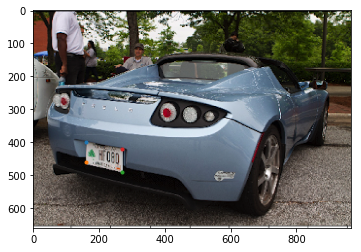

In [9]:
# Read in the image
image = cv2.imread('images/car_plate.png')
# Convert to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

plt.plot(160, 400, '.')
plt.plot(160, 460, '.')
plt.plot(270, 490, '.')
plt.plot(270, 420, '.')

In [16]:
## Define the geometric tranform function
## This function take in an image and returns a 
## geometrically transformed image
def geo_tx(image):
    image_size = (image.shape[1], image.shape[0])
    
    ## Define the four source coordinates
    source_pts = np.float32(
        [[160, 400],
         [160, 460],
         [270, 490],
         [270, 420]])
    
    ## Define the four destination coordinates    
    ## Tip: These points should define a 400x200px rectangle
    warped_pts = np.float32(
        [[160, 400],
         [160, 500],
         [360, 500],
         [360, 400]])
    
    ## Compute the perspective transform, M. 
    ## This matrix is just a grid of numbers that operates on the original image to 
    ## transform the apparent perspective,
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    ## It's also worth noting that you can get the inverse perspective transform to 
    ## unwarp the image by just switching the source and warped points in this function.
    ## This just reverses the transform.
    # M_inv = cv2.getPerspectiveTransform(warped_pts, source_pts)

    ## Using M, create a warped image named `warped`
    ## This function takes in 
    ##   1. image 
    ##   2. perspective matrix M,
    ##   3. the size we want the warped image to be, which I'll just leave as the same size as the original image
    ##   4. how to interpolate points, which is filling in missing points as it warps an image. 
    ##      I'll put that as a linear interpolation.
    ## This function returns the warped image.
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)

    return warped

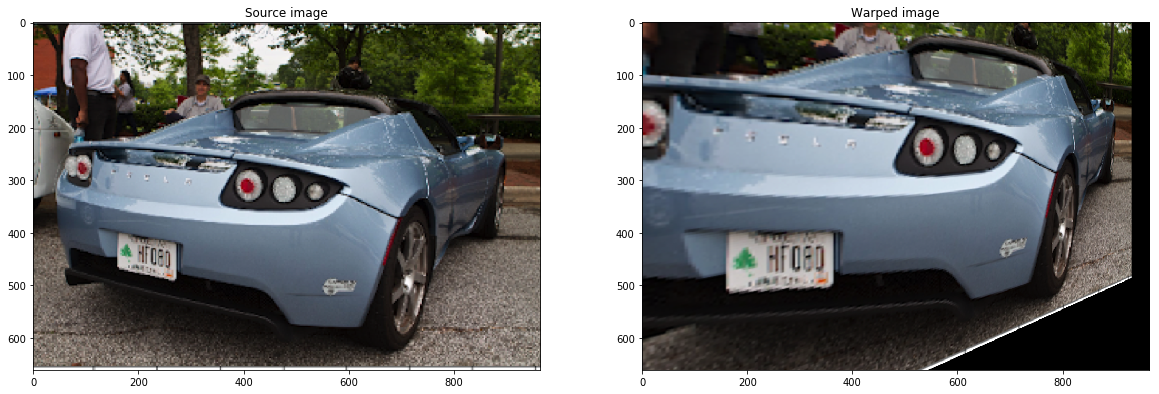

In [17]:
# Make a copy of the original image and warp it
warped_image = np.copy(image)
warped_image = geo_tx(warped_image)

if(warped_image is not None):
    # Visualize
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.set_title('Source image')
    ax1.imshow(image)
    ax2.set_title('Warped image')
    ax2.imshow(warped_image)
else:
    print('No warped image was returned by your function.')